## Bağımlı İki Örneklem T Testi
Bağımlı iki grup ortalaması arasında karşılaştırma yapılmak istenildiğinde kullanılır.

---

**Problem:**<br>
Belirli uğraşlar sonucunda alınan bir eğitimin katma değer sağlayıp sağlamadığı ölçülmek isteniyor.


**Detaylar:**
- Bir departman bir konuda eğitim talep ediyor.
- Gerekli/gereksiz değerlendirmeleri netivesinde eğitim alınıyor.
- Eğitimden önce ve sonra olacak şekilde gerekli ölçümler yapılıyor.
- Eğitim sonrasında eğitimin sağladığı katma değer test edilmek isteniyor.

In [3]:
import pandas as pd
import numpy as np

oncesi = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,
                      121,118,124,121,125,115,115,119,118,121,117,117,120,120,
                      121,117,118,117,123,118,124,121,115,118,125,115])

sonrasi = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,
                       134,134,124,140,134,129,129,138,134,124,122,126,133,127,
                       130,130,130,132,117,130,125,129,133,120,127,123])

oncesi[0:5]

,0
0,123
1,119
2,119
3,116
4,123


In [4]:
sonrasi[0:5]

,0
0,118
1,127
2,122
3,132
4,129


In [5]:
ayrik = pd.concat([oncesi,sonrasi],axis=1)
ayrik.columns = ["öncesi","sonrasi"]
ayrik.head()

,öncesi,sonrasi
0,123,118
1,119,127
2,119,122
3,116,132
4,123,129


In [6]:
grup_oncesi = np.arange(len(oncesi))
grup_oncesi = pd.DataFrame(grup_oncesi)
grup_oncesi[:] = "öncesi"

A = pd.concat([oncesi,grup_oncesi],axis=1)
A.head()

,0,0
0,123,öncesi
1,119,öncesi
2,119,öncesi
3,116,öncesi
4,123,öncesi


In [7]:
grup_sonrasi = np.arange(len(sonrasi))
grup_sonrasi = pd.DataFrame(grup_sonrasi)
grup_sonrasi[:] = "sonrası"

B = pd.concat([sonrasi,grup_sonrasi],axis=1)
B.head()

,0,0
0,118,sonrası
1,127,sonrası
2,122,sonrası
3,132,sonrası
4,129,sonrası


In [8]:
birlikte = pd.concat([A,B])
birlikte

,0,0
0,123,öncesi
1,119,öncesi
2,119,öncesi
3,116,öncesi
4,123,öncesi
...,...,...
35,129,sonrası
36,133,sonrası
37,120,sonrası
38,127,sonrası


In [9]:
birlikte.columns = ["performans","öncesi_sonrası"]
birlikte.head()

,performans,öncesi_sonrası
0,123,öncesi
1,119,öncesi
2,119,öncesi
3,116,öncesi
4,123,öncesi


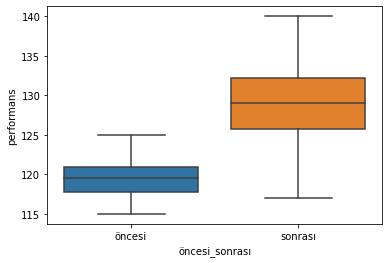

In [10]:
import seaborn as sns

sns.boxplot(x="öncesi_sonrası",y="performans",data=birlikte)

---

# Varsayım Kontrolü


In [12]:
from scipy.stats import shapiro

shapiro(ayrik.öncesi)

(0.9543656706809998, 0.10722451657056808)

pvalue 0.05'ten küçük olmadığından dolayı ifadeyi varsayımı red edemiyoruz.

In [16]:
shapiro(ayrik.sonrasi)

(0.9780089259147644, 0.6159515380859375)

pvalue 0.05'ten yine küçük olmadığından dolayı ifadeyi varsayımı red edemiyoruz.<br>
2.varsayımımızı kontrol edelim:

In [21]:
import scipy.stats as stats

stats.levene(ayrik.öncesi,ayrik.sonrasi)

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

pvalue değeri 0.05'ten küçük olduğu için varsayım red edilir. Yani h0 hipotezi red edilir. Ama bazen varsayımın red etme durumu göz ardı edilebilir.

### Hipotez Testi

In [23]:
stats.ttest_rel(ayrik.öncesi,ayrik.sonrasi)

Ttest_relResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11)

pvalue değeri 0.05'ten küçük olduğu için hipotez red edilir. Yani eğitim işe yaramıştır.

---

## Nonparametrik Bağımlı İki Örneklem Testi

In [24]:
stats.wilcoxon(ayrik.öncesi,ayrik.sonrasi)

WilcoxonResult(statistic=15.0, pvalue=2.491492033374464e-07)

iki grup arasındaki farklılık vardır. Yani verilen eğitim işe yaramıştır.